In [1]:
#set up the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
companies = pd.read_csv(r'1000_Companies.csv')
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
#check on the duplicates
companies.duplicated().sum()

1

In [4]:
#Let's drop the duplicates
companies_dropped_duplicates = companies.drop_duplicates()

In [6]:
#checking for null values
companies_dropped_duplicates.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#checking for the data types
companies_dropped_duplicates.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## EDA

<Axes: title={'center': 'R&D Spend vs Profit '}, xlabel='R&D Spend', ylabel='Profit'>

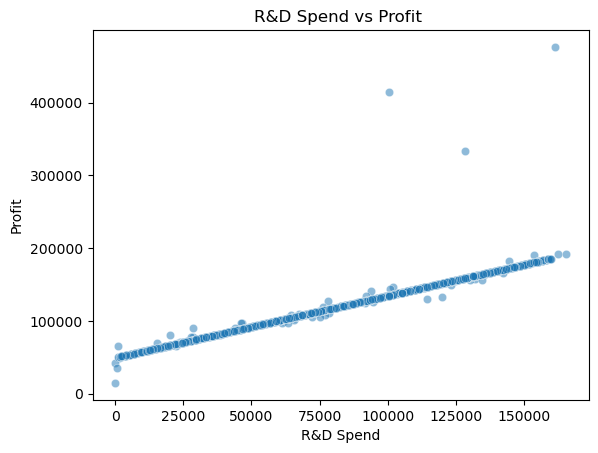

In [8]:
plt.title('R&D Spend vs Profit ')
sns.scatterplot(data = companies_dropped_duplicates, x ='R&D Spend',y ='Profit',alpha =0.5)

<Axes: title={'center': 'Administration vs Profit '}, xlabel='Administration', ylabel='Profit'>

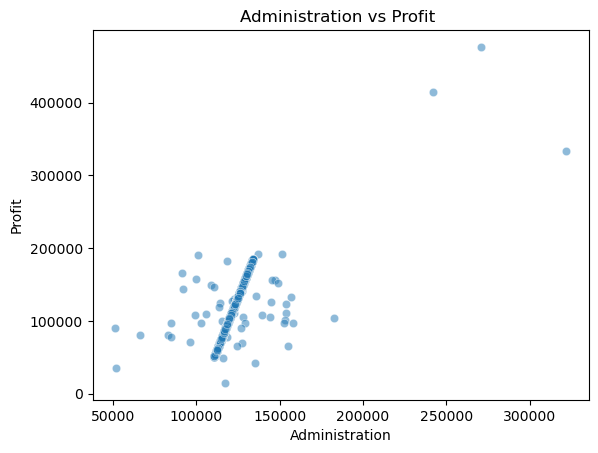

In [9]:
plt.title('Administration vs Profit ')
sns.scatterplot(data = companies_dropped_duplicates, x ='Administration',y ='Profit',alpha =0.5)

<Axes: title={'center': 'Marketing Spend vs Profit '}, xlabel='Marketing Spend', ylabel='Profit'>

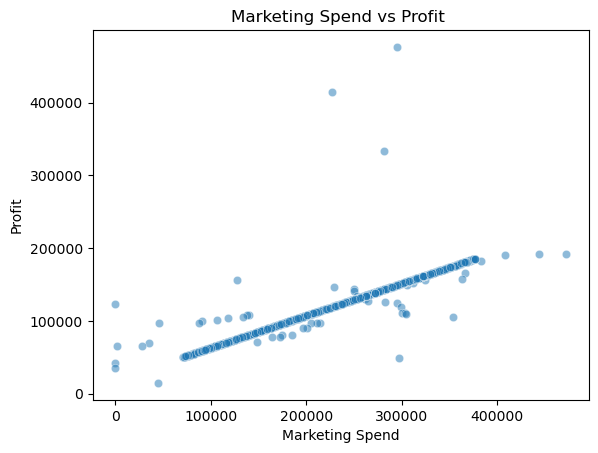

In [10]:
plt.title('Marketing Spend vs Profit ')
sns.scatterplot(data = companies_dropped_duplicates, x ='Marketing Spend',y ='Profit',alpha =0.5)

## The Model

In [12]:
#Let's detemine the targerts and the columns which we'll be using
x = companies_dropped_duplicates[['R&D Spend','Administration','Marketing Spend']]
y = companies_dropped_duplicates['Profit']

In [13]:
#Lets split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([ 85634.08094521,  59670.30466727,  61310.36681849, 100915.49966312,
        91520.22517736, 177153.85223168,  57350.11186962, 176576.17159672,
       175795.31261   ,  91591.6819315 , 164384.61263572, 107135.68278402,
        80927.4039256 ,  60317.72028347,  83721.96651835,  82564.88325309,
        79570.58608009,  65030.4237894 , 104153.43858234, 118054.79456622,
       114306.3271663 , 108188.59405294, 159924.16018605,  88866.85432328,
       122303.45947087, 170323.27333994, 156166.22253878,  90304.59907052,
       168131.35825947,  91942.93933926, 182781.71903544,  96985.37703034,
        77710.98811874, 182799.79838283, 134751.57407753, 125174.64435891,
       127419.93673982,  88777.31811543,  65201.74783367,  57428.45605067,
       178732.78871759,  51756.68208815,  91775.05894709, 173720.48333866,
        94236.44347948, 174798.36147835, 117639.82877574, 111561.69822189,
       163437.59514587,  99636.16516701, 158254.82666392,  54838.79358455,
       130089.66516512,  

In [20]:
X_test

,R&D Spend,Administration,Marketing Spend
453,42722.00,116766.4752,151211.25480
794,12564.00,112312.6043,93021.31149
209,14469.00,112593.9434,96697.01419
309,60472.00,119387.8760,185459.92830
740,49559.00,117776.1945,164403.26500
...,...,...,...
78,28731.00,114700.2205,124215.58210
29,65605.48,153032.0600,107138.38000
277,114589.00,127380.1211,289878.82760
261,142634.00,131521.9344,343991.73170


In [21]:
companies_dropped_duplicates.iloc[453]

R&D Spend              42722.0
Administration     116766.4752
Marketing Spend    151211.2548
State               California
Profit             85529.93509
Name: 453, dtype: object

In [22]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.984018375702256